# Intro to Keras: Neural Networks for Digit Classification
Online lesson link: http://caisplusplus.usc.edu/blog/curriculum/lesson5

#### Relevant guides:
* Getting started with Keras: https://keras.io/
* Sequential model guide: https://keras.io/getting-started/sequential-model-guide/

### Loading in MNIST

In [74]:
# Import MNIST dataset from Keras

from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [75]:
# Data exploration

print("Inputs shape is " + str(train_x.shape))
print("Input type is " + str(type(train_x)))
print("Labels:")
print(train_y)
print("Labels shape is" + str(train_y.shape))
print("Labels type is " + str(type(train_y)))

Inputs shape is (60000, 28, 28)
Input type is <class 'numpy.ndarray'>
Labels:
[5 0 4 ..., 5 6 8]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [76]:
# Input shape: 60000 examples
# Each image: 28 x 28

train_x.shape

(60000, 28, 28)

In [77]:
import matplotlib.pyplot as plt

5


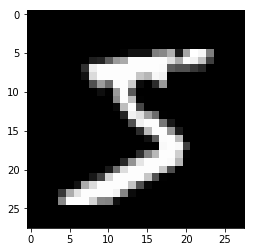

In [78]:
# Visualize the input samples

sample_num = 0

plt.imshow(train_x[sample_num], cmap=plt.get_cmap('gray'))
print(train_y[sample_num])
plt.show()

### Pre-Processing the Data: 
* Flatten the 28 x 28 images into 784-dimensional vectors
* Normalize the pixel values from 0-255 to 0-1
* Categorize the outputs into 10-dimensional "one-hot" vectors

In [3]:
# flatten 28*28 images to a 784 vector for each image

num_pixels = train_x.shape[1] * train_x.shape[2]
train_x_flattened = train_x.reshape(train_x.shape[0], num_pixels).astype('float32')
test_x_flattened = test_x.reshape(test_x.shape[0], num_pixels).astype('float32')

NameError: name 'train_x' is not defined

In [4]:
# Normalize pixel values to between 0-1
train_x_flattened = train_x_flattened / 255.
test_x_flattened = test_x_flattened / 255.

NameError: name 'train_x_flattened' is not defined

In [83]:
import keras

# Use Keras to categorize the outputs ("one-hot" vectors)
train_y_categorical = keras.utils.to_categorical(train_y, num_classes=10)
test_y_categorical = keras.utils.to_categorical(test_y, num_classes=10)

# let's see result of categorizing the outputs
print(test_y_categorical[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### Creating our Neural Network Model
1. Initialize the model, add desired layers
2. Compile the model to get ready for training
3. Set up the callbacks to track the model training/improvement
4. Fit the model to the training data

In [84]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Initialize simple neural network model
model = Sequential()

# Hidden layer 1: 500 neurons
model.add(Dense(units=500, input_dim=784)) # Dense = fully-connected
model.add(Activation('relu')) # Relu activation

# Hidden layer 2: 250 neurons
model.add(Dense(units=250))
model.add(Activation('relu'))

# Output layer: 10 neurons (one for each class)
model.add(Dense(units=10))
model.add(Activation('softmax')) # Softmax activation: output a probability distribution, between 0-1

In [85]:
# Compile the model, get ready to train

model.compile(loss='categorical_crossentropy',
              optimizer='sgd', # stochastic gradient descent
              metrics=['accuracy'])

#### Callback tools:
* **TQDM**: progress bar library
* **Tensorboard**: built-in tool to plot model loss, accuracy, etc.

In [86]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]

In [87]:
# Fit the model to the training data
# 10 epochs, 32 batch size

# Validation split: reserve some of our training data to use as "validation" data
    # Won't train on validation data -- check validation loss to look for overfitting
    
# Pass in our callbacks to track training progress

model.fit(train_x_flattened, train_y_categorical, epochs=20, \
          batch_size=32, verbose=0, validation_split = .1, callbacks=callbacks_list)

HBox(children=(IntProgress(value=0, description='Training', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=54000), HTML(value='')))

**To launch Tensorboard after training:**
* Type in command line: `tensorboard --logdir ./logs`
* Open in browser: `http://localhost:6006`

In [93]:
# Evaluate trained model on test data
loss_and_metrics = model.evaluate(test_x_flattened, test_y_categorical, batch_size=128)
print(loss_and_metrics)

 8960/10000 [=========================>....] - ETA: 0s[0.076234949612244959, 0.97650000000000003]


[[  5.93499635e-07   3.60586654e-07   3.33752214e-05   1.70179948e-04
    4.71735984e-09   1.18259372e-07   3.75181067e-11   9.99784052e-01
    1.75005619e-06   9.52563641e-06]]
7


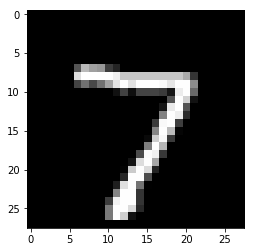

In [94]:
# Make sure our predictions make sense
import numpy as np

sample_num = 0 # which test sample to look at

# Predicted class
test_sample = np.expand_dims(test_x_flattened[sample_num], axis=0) # create a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print(predicted_scores)

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print(predicted_class)

# Actual input
plt.imshow(test_x[sample_num], cmap=plt.get_cmap('gray'))
plt.show()